In [1]:
import pandas as pd
import QCircNet.utils as ut

PLOT_PATH = "results/plots/"

In [2]:
df  = pd.read_csv("results/final_bin_model_results_expID_0.csv", index_col=0)
df.sort_values(by="f1_score", inplace=True, ascending=False)
df.head(5)

,id,f1_score,precision,recall,accuracy,cross_entropy,seed,circuit,learning_rate,loss_history,avg_epoch_time_seconds,model_path,epochs,n_qubits,features_per_qubit,scaler
46,46,0.996805,0.996805,0.996805,0.996716,0.010587,6,DoubleEntanglementVLCircuit,0.01,"[0.16241673720804484, 0.02855318027554619, 0.0...",69.153696,results/models/bin/DoubleEntanglementVLCircuit...,10,4,4,MinMaxScaler
50,50,0.996800,0.998397,0.995208,0.996716,0.012435,7,Senokosov2024Circuit,0.01,"[0.17037289913002351, 0.023847255617606845, 0....",116.717672,results/models/bin/Senokosov2024Circuit_expID_...,10,4,4,MinMaxScaler
0,0,0.996022,0.992076,1.000000,0.995895,0.017164,1,Ranga2024Circuit,0.01,"[0.1194998185291249, 0.02889960845028614, 0.02...",159.599353,results/models/bin/Ranga2024Circuit_expID_0_df...,10,4,4,MinMaxScaler
8,8,0.996003,0.996800,0.995208,0.995895,0.016125,2,Ranga2024Circuit,0.01,"[0.11087902408632401, 0.028543870192247835, 0....",164.906102,results/models/bin/Ranga2024Circuit_expID_0_df...,10,4,4,MinMaxScaler
30,30,0.996003,0.996800,0.995208,0.995895,0.016933,4,DoubleEntanglementVLCircuit,0.01,"[0.13353034393788366, 0.02983052949084116, 0.0...",68.942889,results/models/bin/DoubleEntanglementVLCircuit...,10,4,4,MinMaxScaler


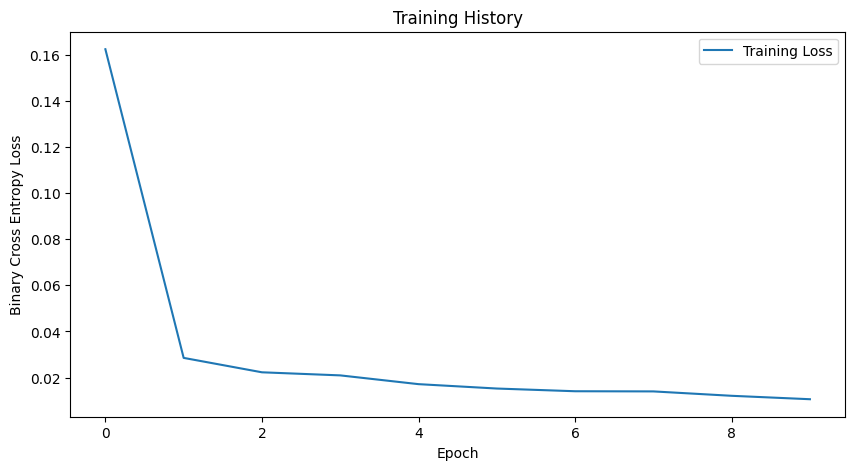

In [3]:
ut.plot_training_history(df, run_id=46, save_path=PLOT_PATH)

In [4]:
# group by circuit, learning_rate
avg_results = df.copy()
avg_results = avg_results.groupby(["circuit", "learning_rate"]).mean(numeric_only=True)
avg_results.drop(columns=["id", "seed", "epochs", "n_qubits", "features_per_qubit"], inplace=True)

In [5]:
avg_results.sort_values(by="f1_score", ascending=False)

,,f1_score,precision,recall,accuracy,cross_entropy,avg_epoch_time_seconds
circuit,learning_rate,,,,,,
Ranga2024Circuit,0.010,0.995317,0.996354,0.994295,0.995191,0.014951,153.444440
DoubleEntanglementVLCircuit,0.010,0.994846,0.998166,0.991556,0.994722,0.015345,72.733510
Senokosov2024Circuit,0.010,0.994040,0.998160,0.989959,0.993901,0.015571,123.892049
Anusha2024Circuit,0.010,0.994038,0.998620,0.989503,0.993901,0.019581,49.887938
Ranga2024Circuit,0.001,0.993695,0.998387,0.989046,0.993549,0.024865,153.323604
Anusha2024Circuit,0.001,0.993579,0.998387,0.988818,0.993432,0.033055,49.845276
Senokosov2024Circuit,0.001,0.993350,0.998157,0.988590,0.993197,0.027056,123.832689
DoubleEntanglementVLCircuit,0.001,0.993238,0.997699,0.988818,0.993080,0.031376,72.920293


In [6]:
df_vis  = pd.read_csv("results/vis_bin_model_results.csv", index_col=0)
df_vis

,id,f1_score,precision,recall,accuracy,cross_entropy,seed,circuit,learning_rate,loss_history,val_loss_history,val_f1_history,avg_epoch_time_seconds,network_str,model_path,epochs,n_qubits,features_per_qubit,scaler
0,0,0.992783,0.996779,0.988818,0.992611,0.027617,6,DoubleEntanglementVLCircuit,0.001,"[0.5668240442479912, 0.228333259540561, 0.1221...","[0.3371672034263611, 0.15724627673625946, 0.09...","[0.9817605075337034, 0.9911929543634908, 0.994...",222.027834,BinQuantumNeuralNetwork(\n (quantum_circuit_n...,results/models/bin/DoubleEntanglementVLCircuit...,10,4,4,MinMaxScaler


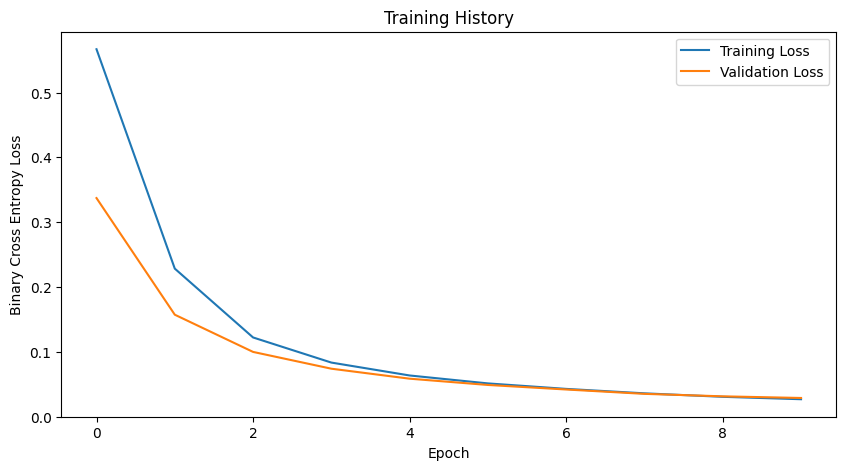

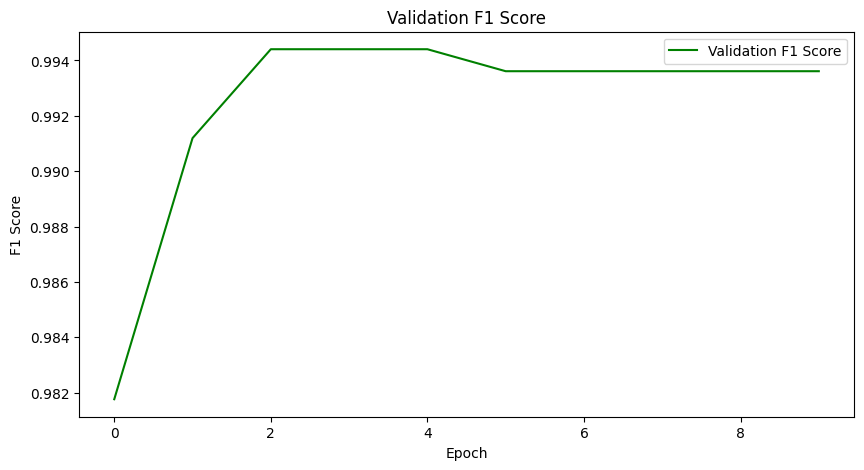

In [ ]:
ut.plot_training_history(df_vis, run_id=0, save_path=PLOT_PATH, val=True)